# 🍷 Youth Alcohol Use Prediction Using Tree-Based Models

This notebook explores social, behavioral, and demographic factors contributing to alcohol consumption among youth using decision tree-based methods.

We use machine learning problem type:
- **Regression** (Days of alcohol use in the past year)

We evaluate Decision Tree, Bagging, Random Forest, and Gradient Boosting models using accuracy, F1-score, confusion matrices.

Regression Evaluation:
Mean Absolute Error: 30.73365034114477
Mean Squared Error: 2230.871915775217
Root Mean Squared Error: 47.232106831849215
R^2 Score: -0.3269097257854139


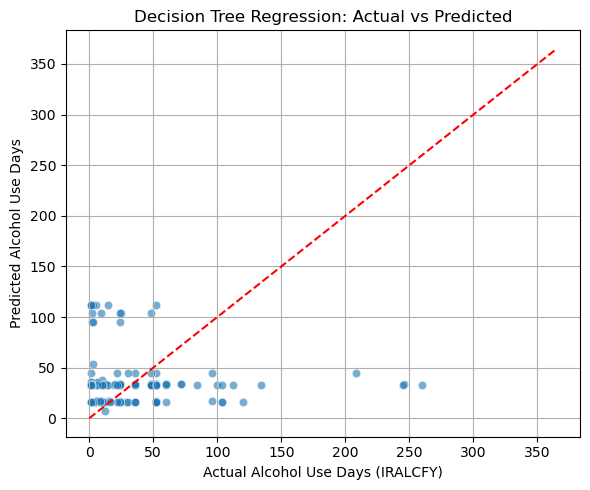

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor


df = pd.read_csv("youth_data.csv")

missing_codes = [91, 93, 94, 97, 98, 99, 991, 993, 997, 998, 999]
df = df.replace(missing_codes, np.nan)

df = df[df['IRALCFY'].notna()]

predictors = [
    'IRMJAGE', 'EDUSCHGRD2', 'TOBFLAG', 'NEWRACE2', 'EDUSKPCOM',
    'HEALTH2', 'INCOME', 'POVERTY3', 'DRPRVME3', 'FRDADLY2',
    'PRVDRGO2', 'PRPROUD2', 'PRTALK3', 'TALKPROB', 'PREVIOL2',
    'FRDMJMON', 'SCHFELT'
]

df = df.dropna(subset=predictors)

X = df[predictors]
y = df['IRALCFY']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Regression Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([0, 365], [0, 365], '--', color='red')
plt.xlabel("Actual Alcohol Use Days (IRALCFY)")
plt.ylabel("Predicted Alcohol Use Days")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.tight_layout()
plt.grid(True)
plt.show()

In [2]:
from sklearn.tree import export_text, plot_tree, DecisionTreeRegressor

tree_summary = export_text(regressor, feature_names=X.columns.tolist())
print(tree_summary)

|--- TOBFLAG <= 0.50
|   |--- IRMJAGE <= 11.50
|   |   |--- PRVDRGO2 <= 1.50
|   |   |   |--- value: [208.00]
|   |   |--- PRVDRGO2 >  1.50
|   |   |   |--- EDUSCHGRD2 <= 4.50
|   |   |   |   |--- FRDMJMON <= 1.50
|   |   |   |   |   |--- value: [32.00]
|   |   |   |   |--- FRDMJMON >  1.50
|   |   |   |   |   |--- value: [7.00]
|   |   |   |--- EDUSCHGRD2 >  4.50
|   |   |   |   |--- HEALTH2 <= 2.50
|   |   |   |   |   |--- value: [94.67]
|   |   |   |   |--- HEALTH2 >  2.50
|   |   |   |   |   |--- value: [38.00]
|   |--- IRMJAGE >  11.50
|   |   |--- EDUSCHGRD2 <= 3.50
|   |   |   |--- HEALTH2 <= 1.50
|   |   |   |   |--- value: [30.00]
|   |   |   |--- HEALTH2 >  1.50
|   |   |   |   |--- value: [104.00]
|   |   |--- EDUSCHGRD2 >  3.50
|   |   |   |--- FRDADLY2 <= 1.50
|   |   |   |   |--- EDUSCHGRD2 <= 4.50
|   |   |   |   |   |--- value: [36.00]
|   |   |   |   |--- EDUSCHGRD2 >  4.50
|   |   |   |   |   |--- value: [15.71]
|   |   |   |--- FRDADLY2 >  1.50
|   |   |   |   |--- I

In [3]:
importances = pd.DataFrame({'feature_name': X.columns, 'importance': regressor.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
print(importances)

   feature_name  importance
0    EDUSCHGRD2    0.230624
1       HEALTH2    0.192087
2       IRMJAGE    0.136807
3       TOBFLAG    0.132840
4       SCHFELT    0.077764
5     EDUSKPCOM    0.061002
6      PRVDRGO2    0.057935
7      PRPROUD2    0.041214
8      FRDADLY2    0.037837
9      TALKPROB    0.023449
10       INCOME    0.006756
11     FRDMJMON    0.001585
12     NEWRACE2    0.000103
13     POVERTY3    0.000000
14      PRTALK3    0.000000
15     PREVIOL2    0.000000
16     DRPRVME3    0.000000


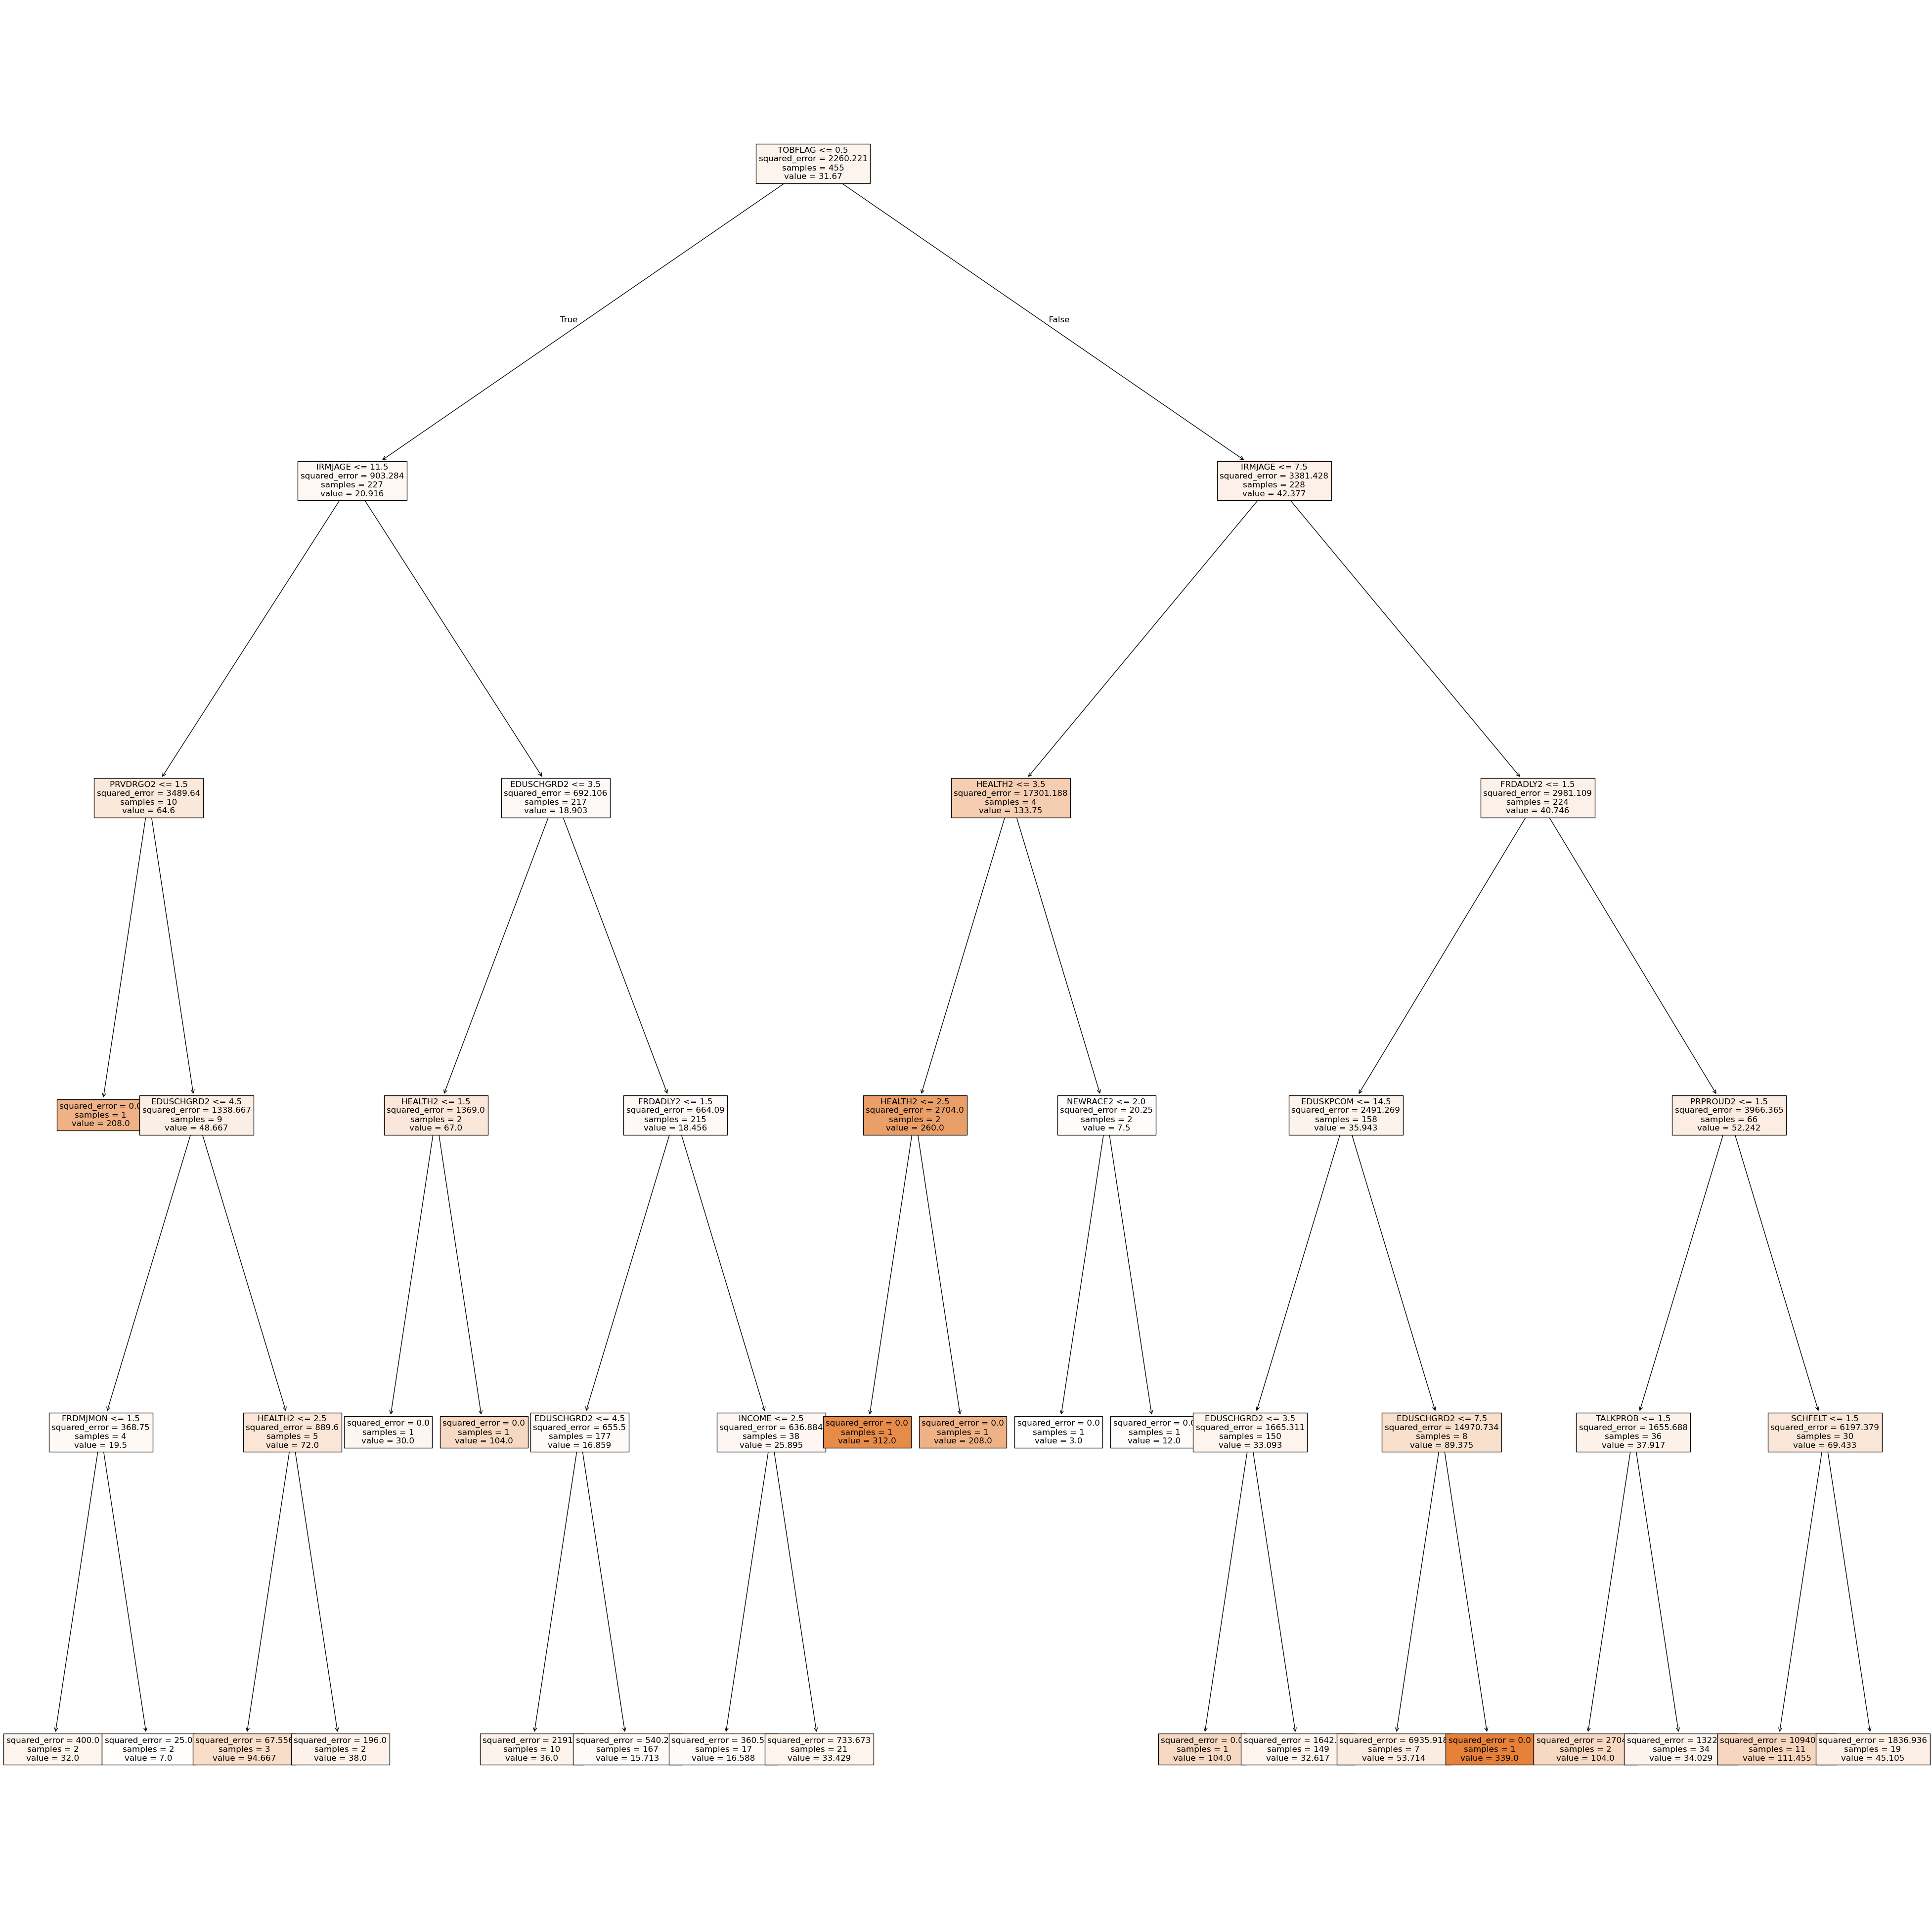

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))
plot_tree(regressor
          , filled=True
          , feature_names=X.columns
          , class_names=['No', 'Yes']
          , label='all'
          , fontsize=12)
plt.show()

In [5]:
r2 = regressor.score(X_test, y_test)
print("R² Score: {:.4f}".format(r2))

R² Score: -0.3269


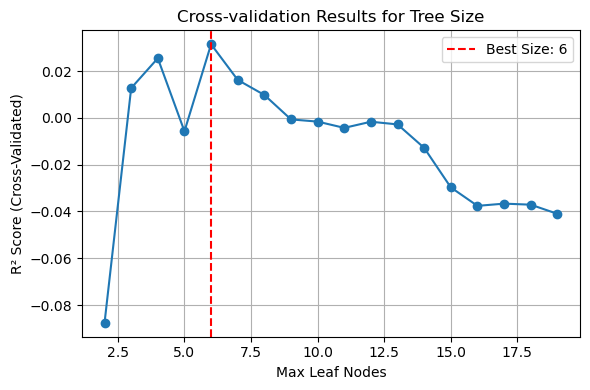

🌳 Best Tree Size (max_leaf_nodes): 6
✅ Best R² Score (CV): 0.0315


In [6]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': range(2, 20)}
cv_carseats = GridSearchCV(
    regressor,
    params,
    cv=10,
    scoring='r2',      
    n_jobs=-1
)

# Fit
cv_carseats.fit(X_train, y_train)

# Results
cv_results = cv_carseats.cv_results_
best_size = cv_carseats.best_params_['max_leaf_nodes']
best_score = cv_carseats.best_score_

# Plot results
plt.figure(figsize=(6, 4))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], marker='o')
plt.axvline(x=best_size, color='r', linestyle='--', label=f"Best Size: {best_size}")
plt.xlabel('Max Leaf Nodes')
plt.ylabel('R² Score (Cross-Validated)')
plt.title('Cross-validation Results for Tree Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print best size
print("🌳 Best Tree Size (max_leaf_nodes):", best_size)
print("✅ Best R² Score (CV): {:.4f}".format(best_score))

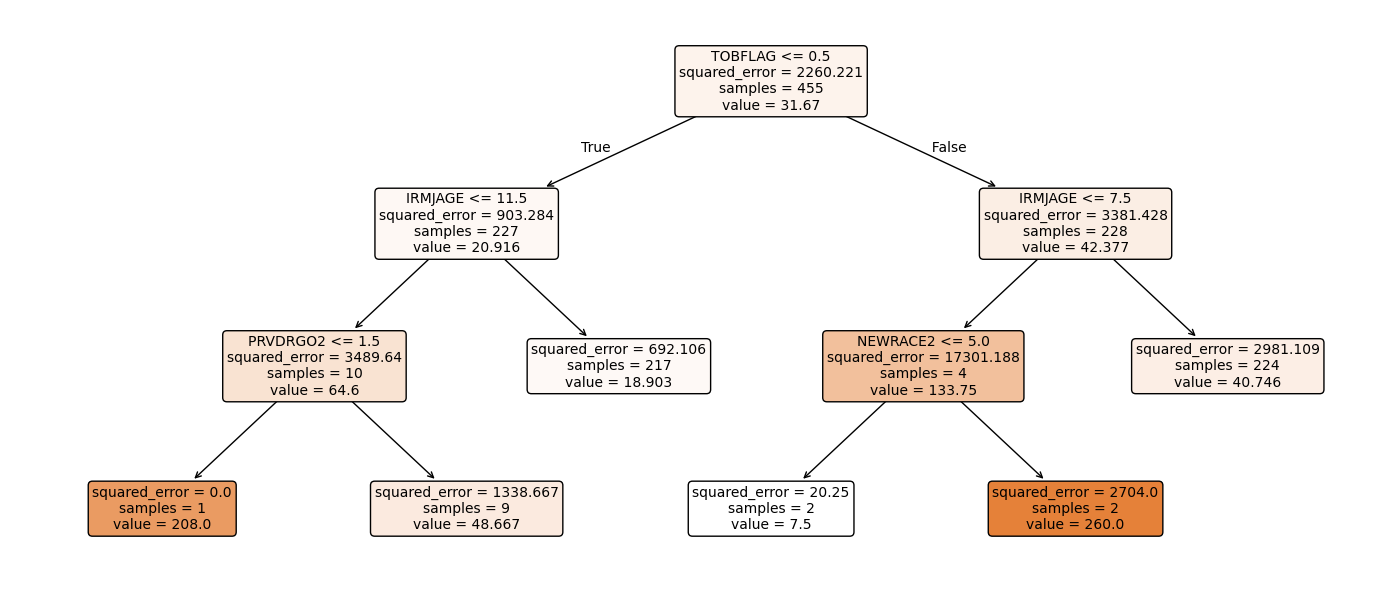

In [7]:
prune_tree = DecisionTreeRegressor(
    max_leaf_nodes=best_size,
    random_state=7
)
prune_tree.fit(X_train, y_train)

plt.figure(figsize=(14, 6))
plt.title('Pruned Regression Tree')
plot_tree(
    prune_tree,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.show()

In [8]:
r2 = prune_tree.score(X_test, y_test)
print("R² Score: {:.4f}".format(r2))

R² Score: 0.0080


In [9]:
bag_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=100,
    random_state=42
)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)

In [10]:
p = X_train.shape[1]
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_features= p// 3,  
    max_depth=5,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [11]:
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [12]:

def print_eval(model_name, y_true, y_pred):
    print(f"\n{model_name} Evaluation:")
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R^2 Score:", r2_score(y_true, y_pred))

print_eval("Bagging Regressor", y_test, y_pred_bag)
print_eval("Random Forest Regressor", y_test, y_pred_rf)
print_eval("Gradient Boosting Regressor", y_test, y_pred_gb)



Bagging Regressor Evaluation:
Mean Absolute Error: 29.067124654955588
Mean Squared Error: 1879.9904920036743
Root Mean Squared Error: 43.35885713442727
R^2 Score: -0.11820748227803457

Random Forest Regressor Evaluation:
Mean Absolute Error: 28.290844818169976
Mean Squared Error: 1765.9118556627245
Root Mean Squared Error: 42.02275402282345
R^2 Score: -0.05035416851549024

Gradient Boosting Regressor Evaluation:
Mean Absolute Error: 29.482368457384382
Mean Squared Error: 1982.0177772826912
Root Mean Squared Error: 44.51985823520433
R^2 Score: -0.17889272206024143


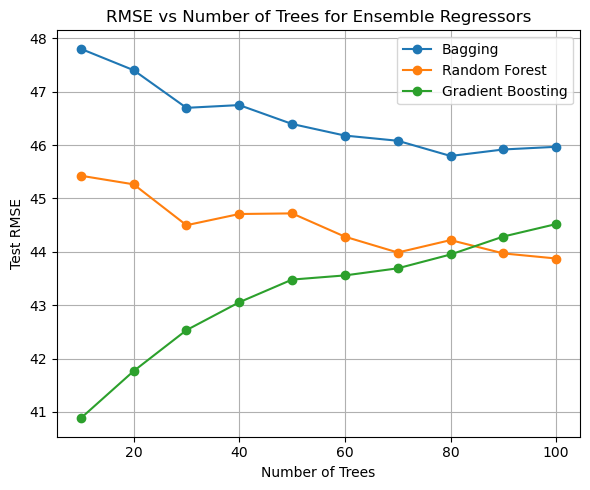

In [13]:
tree_range = range(10, 110, 10)
bag_rmse, rf_rmse, gb_rmse = [], [], []

for n in tree_range:
    bag = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    bag_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    p = X_train.shape[1]
    rf = RandomForestRegressor(
        n_estimators=n,
        max_features=p // 3,
        random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    gb = GradientBoostingRegressor(
        n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    gb_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(6, 5))
plt.plot(tree_range, bag_rmse, label="Bagging", marker='o')
plt.plot(tree_range, rf_rmse, label="Random Forest", marker='o')
plt.plot(tree_range, gb_rmse, label="Gradient Boosting", marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Test RMSE")
plt.title("RMSE vs Number of Trees for Ensemble Regressors")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

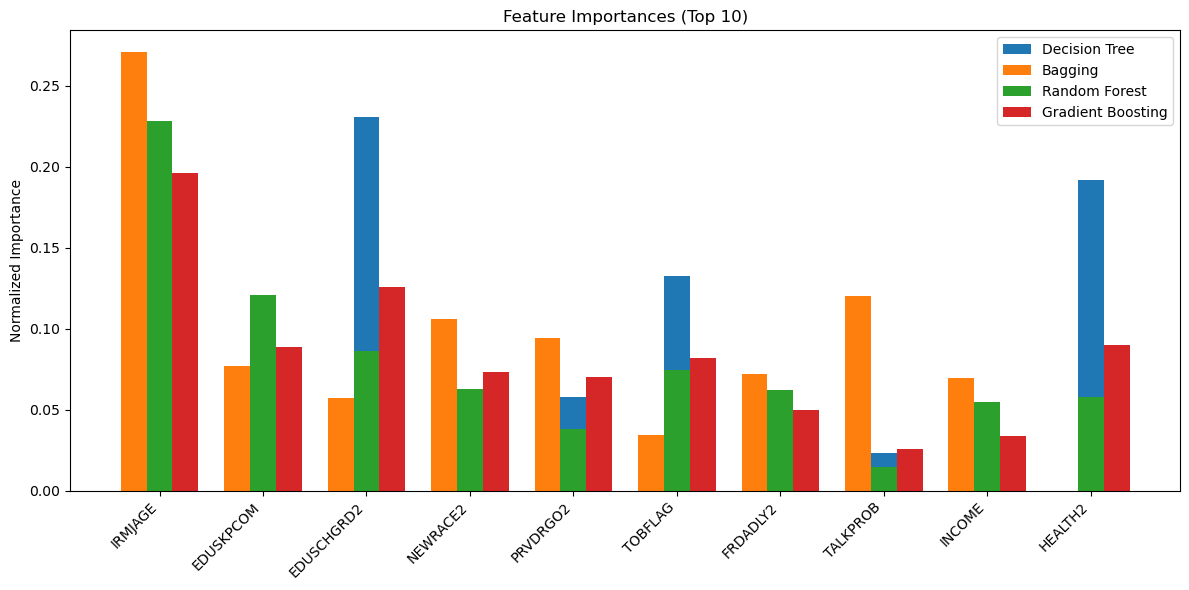

In [15]:
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Decision Tree': regressor.feature_importances_,
    'Bagging': bag_model.estimators_[0].feature_importances_,
    'Random Forest': rf_model.feature_importances_,
    'Gradient Boosting': gb_model.feature_importances_
})

importance_df[['Decision Tree','Bagging', 'Random Forest', 'Gradient Boosting']] = importance_df[
    ['Decision Tree','Bagging', 'Random Forest', 'Gradient Boosting']
].div(importance_df[
    ['Decision Tree','Bagging', 'Random Forest', 'Gradient Boosting']
].sum(axis=0), axis=1)

importance_df['Average'] = importance_df[['Bagging', 'Random Forest', 'Gradient Boosting']].mean(axis=1)
importance_df = importance_df.sort_values('Average', ascending=False).head(10)

x = np.arange(len(importance_df))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x, importance_df['Decision Tree'], width=width, label='Decision Tree')
plt.bar(x - width, importance_df['Bagging'], width=width, label='Bagging')
plt.bar(x, importance_df['Random Forest'], width=width, label='Random Forest')
plt.bar(x + width, importance_df['Gradient Boosting'], width=width, label='Gradient Boosting')
plt.xticks(x, importance_df['Feature'], rotation=45, ha='right')
plt.ylabel("Normalized Importance")
plt.title("Feature Importances (Top 10)")
plt.legend()
plt.tight_layout()
plt.show()

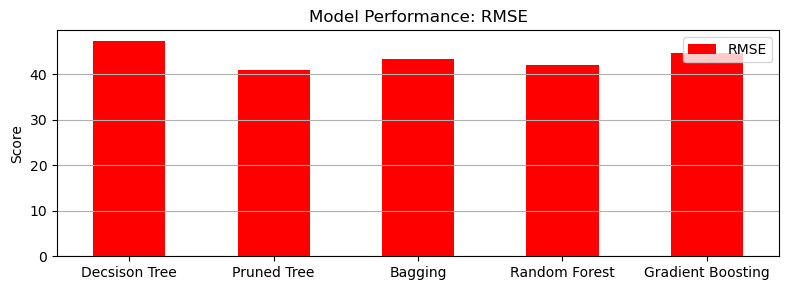

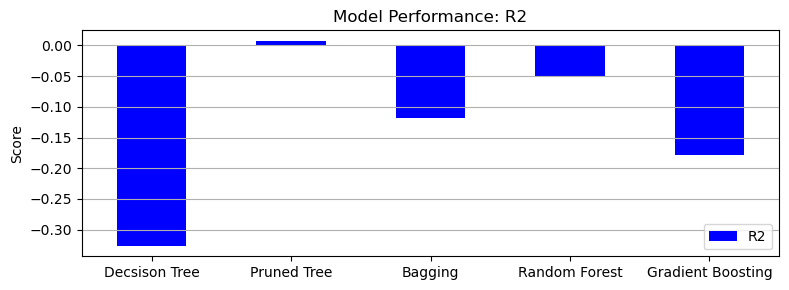

In [17]:
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

dec_eval = evaluate_model(y_test, regressor.predict(X_test))
prune_eval= evaluate_model(y_test, prune_tree.predict(X_test))
bag_eval = evaluate_model(y_test, bag_model.predict(X_test))
rf_eval = evaluate_model(y_test, rf_model.predict(X_test))
gb_eval = evaluate_model(y_test, gb_model.predict(X_test))


performance_df = pd.DataFrame([dec_eval,prune_eval,bag_eval, rf_eval, gb_eval],
                              index=["Decsison Tree", "Pruned Tree", "Bagging", "Random Forest", "Gradient Boosting"])

performance_df[["RMSE"]].plot(kind='bar', figsize=(8, 3), color="red")
plt.title("Model Performance: RMSE")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


performance_df[["R2"]].plot( kind='bar', figsize=(8, 3), color="blue")
plt.title("Model Performance: R2")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()



 Bagging Best Params: {'max_samples': 0.5, 'n_estimators': 50}


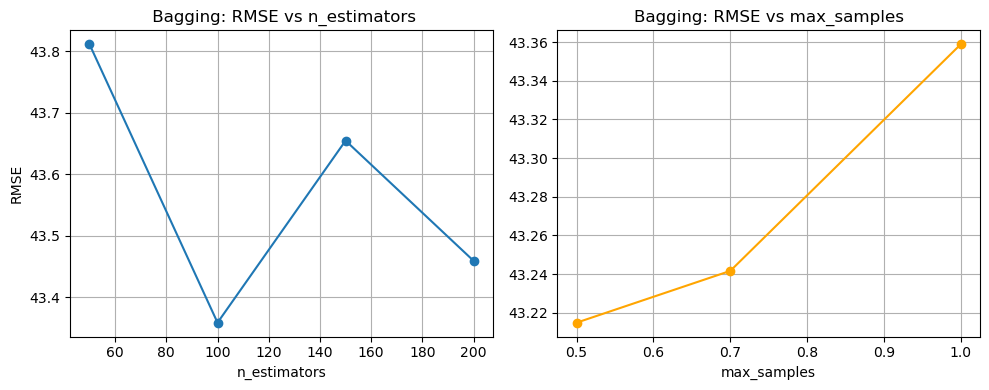

In [18]:
bag_params = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.8, 1.0]
}
bag_grid = GridSearchCV(
    BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42),
    param_grid=bag_params,
    cv=5,
    scoring='neg_mean_squared_error'
)
bag_grid.fit(X_train, y_train)
bag_model = bag_grid.best_estimator_
print("\n Bagging Best Params:", bag_grid.best_params_)

bag_estimators = [50, 100, 150, 200]
bag_samples = [0.5, 0.7, 1.0]
bag_rmse_estimators, bag_rmse_samples = [], []

for n in bag_estimators:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    bag_rmse_estimators.append(np.sqrt(mean_squared_error(y_test, preds)))

for s in bag_samples:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, max_samples=s, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    bag_rmse_samples.append(np.sqrt(mean_squared_error(y_test, preds)))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(bag_estimators, bag_rmse_estimators, marker='o')
plt.title(" Bagging: RMSE vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(bag_samples, bag_rmse_samples, marker='o', color='orange')
plt.title("Bagging: RMSE vs max_samples")
plt.xlabel("max_samples")
plt.grid(True)
plt.tight_layout()
plt.show()


 Random Forest Best Params: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


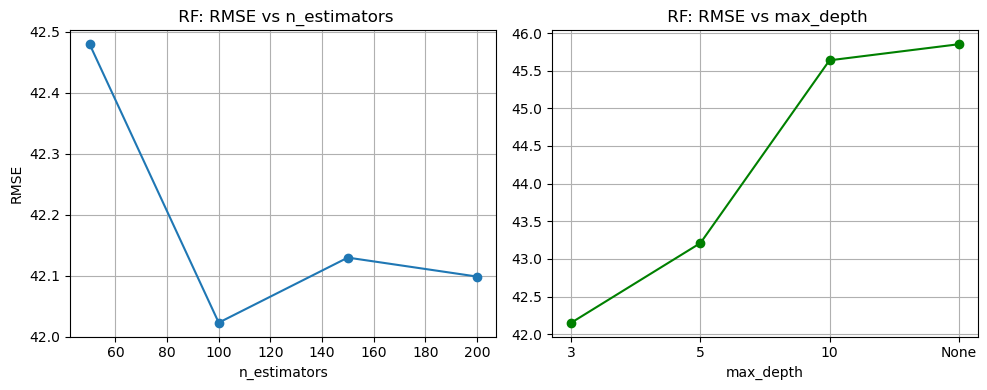

In [19]:
p = X_train.shape[1]
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'max_features': [p // 3, p // 2, 'sqrt']
}
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

rf_grid.fit(X_train, y_train)
rf_model = rf_grid.best_estimator_
print("\n Random Forest Best Params:", rf_grid.best_params_)

rf_estimators = [50, 100, 150, 200]
rf_depths = [3, 5, 10, None]
rf_rmse_estimators, rf_rmse_depth = [], []

for n in rf_estimators:
    model = RandomForestRegressor(n_estimators=n, max_features=p // 3, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rf_rmse_estimators.append(np.sqrt(mean_squared_error(y_test, preds)))

for d in rf_depths:
    model = RandomForestRegressor(n_estimators=100, max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rf_rmse_depth.append(np.sqrt(mean_squared_error(y_test, preds)))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(rf_estimators, rf_rmse_estimators, marker='o')
plt.title(" RF: RMSE vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot([str(d) for d in rf_depths], rf_rmse_depth, marker='o', color='green')
plt.title(" RF: RMSE vs max_depth")
plt.xlabel("max_depth")
plt.grid(True)
plt.tight_layout()
plt.show()


Gradient Boosting Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


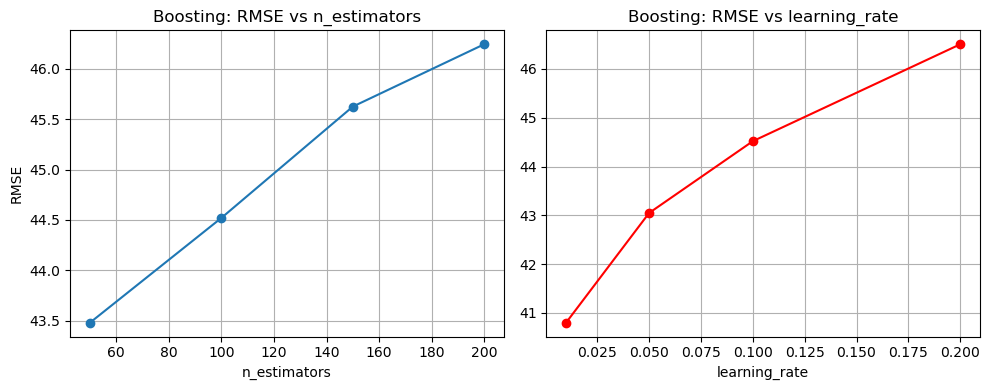

In [20]:
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=gb_params,
    cv=5,
    scoring='neg_mean_squared_error'
)
gb_grid.fit(X_train, y_train)
gb_model = gb_grid.best_estimator_
print("\nGradient Boosting Best Params:", gb_grid.best_params_)

gb_estimators = [50, 100, 150, 200]
gb_lrs = [0.01, 0.05, 0.1, 0.2]
gb_rmse_estimators, gb_rmse_lr = [], []

for n in gb_estimators:
    model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    gb_rmse_estimators.append(np.sqrt(mean_squared_error(y_test, preds)))

for lr in gb_lrs:
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=lr, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    gb_rmse_lr.append(np.sqrt(mean_squared_error(y_test, preds)))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(gb_estimators, gb_rmse_estimators, marker='o')
plt.title("Boosting: RMSE vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(gb_lrs, gb_rmse_lr, marker='o', color='red')
plt.title("Boosting: RMSE vs learning_rate")
plt.xlabel("learning_rate")
plt.grid(True)
plt.tight_layout()
plt.show()





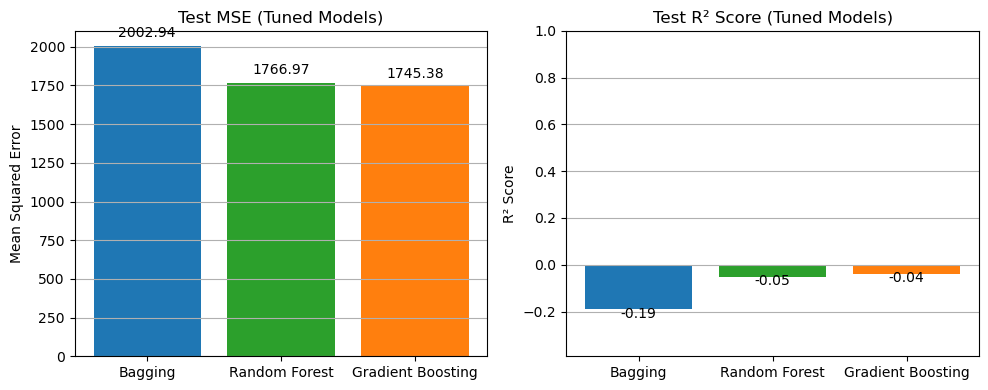

In [21]:
y_pred_bag = bag_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

mse_bag = mean_squared_error(y_test, y_pred_bag)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

r2_bag = r2_score(y_test, y_pred_bag)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)

models = ['Bagging', 'Random Forest', 'Gradient Boosting']
mse_values = [mse_bag, mse_rf, mse_gb]
r2_values = [r2_bag, r2_rf, r2_gb]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
bars1 = plt.bar(models, mse_values, color=['#1f77b4', '#2ca02c', '#ff7f0e'])
plt.title("Test MSE (Tuned Models)")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y')
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02 * height,
             f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)
bars2 = plt.bar(models, r2_values, color=['#1f77b4', '#2ca02c', '#ff7f0e'])
plt.title("Test R² Score (Tuned Models)")
plt.ylabel("R² Score")
plt.ylim(min(r2_values) - 0.2, 1.0)  
plt.grid(axis='y')
for bar in bars2:
    height = bar.get_height()
    offset = 0.03 if height >= 0 else -0.05  # adjust label position
    plt.text(bar.get_x() + bar.get_width()/2, height + offset,
             f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 📊 Conclusions & Reflections

**Top Predictors**: Education grade level, marijuana age, peer influence, and race consistently ranked as top features.
**Best Models**:
  - **Regression**: Pruned Decision Tree performed best by RMSE, but R² scores remained low.
**Limitations**:
  - Low explanatory power in regression models

## Potential Improvements
- Try **ordinal classification** or dimensionality reduction (e.g., PCA)
- Consider testing additional features on mental health or social risk

This work can support better-targeted youth intervention strategies, highlighting the importance of early school engagement, family involvement, and peer environments.